<a href="https://colab.research.google.com/github/EricCallaway/COSC_6315_Programming_Assignment-1/blob/main/Multivariable_Linear_Regression02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np

Import Dataset

In [2]:
path = '/MVLR_Train.csv'
test_path = '/MVLR_Test.csv'
data_df = pd.read_csv(path)
data_df_test = pd.read_csv(test_path)

First five rows of Training dataset

In [32]:
data_df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,2003,2,548,2008,208500
1,2,20,80.0,9600,1976,1976,1976,2,460,2007,181500
2,3,60,68.0,11250,2001,2002,2001,2,608,2008,223500
3,4,70,60.0,9550,1915,1970,1998,3,642,2006,140000
4,5,60,84.0,14260,2000,2000,2000,3,836,2008,250000


In [33]:

# Replace infinite updated data with nan
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data_df.dropna(inplace=True)

# Change the GarageYrBlt column from float64 to int64 datatype
print(data_df.dtypes)
data_df['GarageYrBlt'] = data_df['GarageYrBlt'].astype(int)
print(data_df.dtypes)


Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt       int64
GarageCars        int64
GarageArea        int64
YrSold            int64
SalePrice         int64
dtype: object
Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt       int64
GarageCars        int64
GarageArea        int64
YrSold            int64
SalePrice         int64
dtype: object


First five rows of Testing dataset

In [26]:
data_df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1461,20,80,11622,1961,1961,1961,1,730,2010
1,1462,20,81,14267,1958,1958,1958,1,312,2010
2,1463,60,74,13830,1997,1998,1997,2,482,2010
3,1464,60,78,9978,1998,1998,1998,2,470,2010
4,1465,120,43,5005,1992,1992,1992,2,506,2010



Define X and Y

In [27]:
x_cols = ['GarageYrBlt','GarageCars','GarageArea']
x_train=data_df[x_cols].values
x_test=data_df_test[x_cols].values

y_col=['SalePrice']
y_train=data_df[y_col].values

print(x_train)
print(x_test)
print(y_train)

[[2003    2  548]
 [1976    2  460]
 [2001    2  608]
 ...
 [1941    1  252]
 [1950    1  240]
 [1965    1  276]]
[[1961    1  730]
 [1958    1  312]
 [1997    2  482]
 ...
 [1960    2  576]
 [   0    0    0]
 [1993    3  650]]
[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


Clean Dataset

In [28]:
np.any(np.isnan(x_train))
np.all(np.isfinite(x_train))

np.any(np.isnan(y_train))
np.all(np.isfinite(y_train))




True

Train Model

In [29]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the Test, set results

In [30]:
y_pred=ml.predict(x_test)
y_train_pred=ml.predict(x_train)
print(y_pred)

[[ 156223.17380996]
 [ 115672.09872781]
 [ 198543.07940605]
 ...
 [ 189348.21942295]
 [-913323.33867231]
 [ 260324.30460967]]


In [34]:
ml.predict([[2003,	2,	548	]])

array([[207632.27538382]])

Evaluate the Model

In [35]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.45379700615631535

Save Predictions to .csv file

In [37]:
pred_path = '/MVLR_Test02(Predictions).csv'
prediction = pd.DataFrame(y_pred, columns=['SalePrice(Predicted)']).to_csv(pred_path)

Plot Results

Text(0, 0.5, 'Predicted')

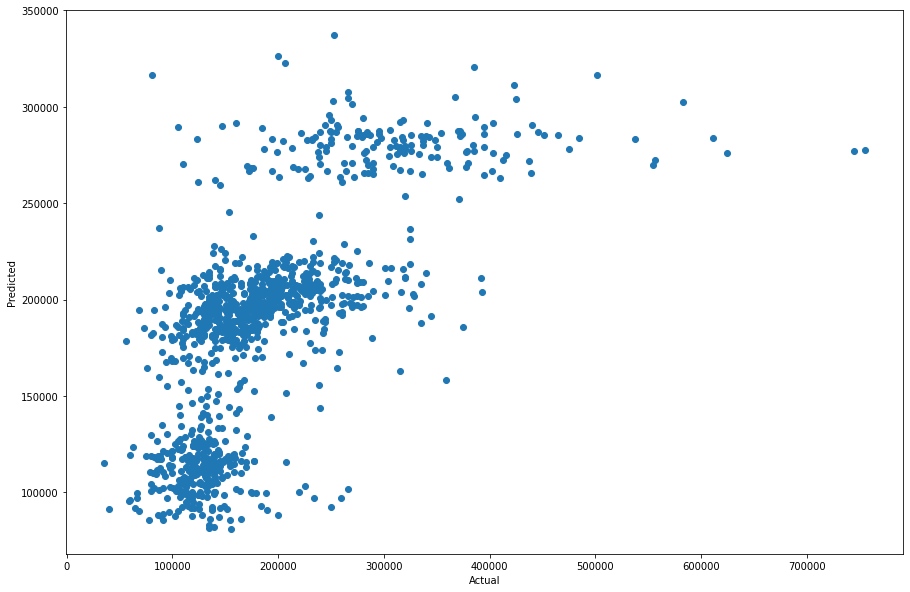

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Predicted Values

In [41]:
pred_y_df = pd.DataFrame({'Actual Value': [y_train], 'Predicted Value': [y_train_pred], 'Difference': [y_train-y_train_pred]})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,"[[208500], [181500], [223500], [140000], [2500...","[[207632.27538381563], [186277.2667630606], [2...","[[867.724616184365], [-4777.2667630605865], [1..."
